### Installing Libraries

In [16]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Installing Libraries and Downloading ')

try :   
    data['NSM'] = pd.to_datetime(data['date'])
    ! pip install folium
    ! pip install pivottablejs
    ! pip install pandas
    ! pip install matplotlib
    ! pip install seaborn
    ! pip install plotly
    ! pip install missingno
    ! pip install pandas_profiling
    ! pip install mpld3
    ! pip install sklearn
    ! pip install pandas-profiling

except :
    logging.ERROR('Installation of libraries failed')


### Importing Libraries

In [17]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Importing Libraries')

try :
    %matplotlib inline
    %config InlineBackend.figure_format='retina'

    import matplotlib.pyplot as plt
    import pandas as pd
    import time
    import numpy as np
    import seaborn as sns
    import datetime
    import matplotlib as mpl

    from matplotlib import pyplot as plt
    from matplotlib.pyplot import GridSpec
    from pandas.tools.plotting import scatter_matrix
    from sklearn.datasets import make_blobs
    import missingno as msno
    import pivottablejs
    import pandas_profiling
    import logging

except :
    logging.ERROR('Importing of libraries failed')

### Load Data

In [18]:
logfilename = 'log_EnergyConsumption.txt'
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')

logging.debug('Loading Data into Dataframe')
try :  
    data= pd.read_csv("./Dataset/energydata_complete.csv")
    
except :
    logging.ERROR('Data logging failed')

In [19]:
data.head(10)


date  Appliances  lights         T1       RH_1     T2  \
0  2016-01-11 17:00:00          60      30  19.890000  47.596667  19.20   
1  2016-01-11 17:10:00          60      30  19.890000  46.693333  19.20   
2  2016-01-11 17:20:00          50      30  19.890000  46.300000  19.20   
3  2016-01-11 17:30:00          50      40  19.890000  46.066667  19.20   
4  2016-01-11 17:40:00          60      40  19.890000  46.333333  19.20   
5  2016-01-11 17:50:00          50      40  19.890000  46.026667  19.20   
6  2016-01-11 18:00:00          60      50  19.890000  45.766667  19.20   
7  2016-01-11 18:10:00          60      50  19.856667  45.560000  19.20   
8  2016-01-11 18:20:00          60      40  19.790000  45.597500  19.20   
9  2016-01-11 18:30:00          70      40  19.856667  46.090000  19.23   

        RH_2     T3       RH_3         T4    ...             T9   RH_9  \
0  44.790000  19.79  44.730000  19.000000    ...      17.033333  45.53   
1  44.722500  19.79  44.790000  19.000000    ...      17.066667  45.56   
2  44.626667  19.79  44.933333  18.926667    ...      17.000000  45.50   
3  44.590000  19.79  45.000000  18.890000    ...      17.000000  45.40   
4  44.530000  19.79  45.000000  18.890000    ...      17.000000  45.40   
5  44.500000  19.79  44.933333  18.890000    ...      17.000000  45.29   
6  44.500000  19.79  44.900000  18.890000    ...      17.000000  45.29   
7  44.500000  19.73  44.900000  18.890000    ...      17.000000  45.29   
8  44.433333  19.73  44.790000  18.890000    ...      17.000000  45.29   
9  44.400000  19.79  44.863333  18.890000    ...      17.000000  45.29   

      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
0  6.600000   733.500000  92.000000   7.000000   63.000000   5.300000   
1  6.483333   733.600000  92.000000   6.666667   59.166667   5.200000   
2  6.366667   733.700000  92.000000   6.333333   55.333333   5.100000   
3  6.250000   733.800000  92.000000   6.000000   51.500000   5.000000   
4  6.133333   733.900000  92.000000   5.666667   47.666667   4.900000   
5  6.016667   734.000000  92.000000   5.333333   43.833333   4.800000   
6  5.900000   734.100000  92.000000   5.000000   40.000000   4.700000   
7  5.916667   734.166667  91.833333   5.166667   40.000000   4.683333   
8  5.933333   734.233333  91.666667   5.333333   40.000000   4.666667   
9  5.950000   734.300000  91.500000   5.500000   40.000000   4.650000   

         rv1        rv2  
0  13.275433  13.275433  
1  18.606195  18.606195  
2  28.642668  28.642668  
3  45.410389  45.410389  
4  10.084097  10.084097  
5  44.919484  44.919484  
6  47.233763  47.233763  
7  33.039890  33.039890  
8  31.455702  31.455702  
9   3.089314   3.089314  

[10 rows x 29 columns]

In [20]:
data.shape

(19735, 29)

#### Added Number of Seconds From Midnight column 

In [21]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Added Number of Seconds From Midnight column ')
try :
    data['NSM'] = pd.to_datetime(data['date'])
    (data['NSM'].dt.hour*60 + data['NSM'].dt.minute)*60 + data['NSM'].dt.second
    
except :
    logging.ERROR('Addition of midnight column failed')

In [22]:
data.shape

(19735, 30)

In [23]:
data.describe().T

count        mean         std         min         25%  \
Appliances   19735.0   97.694958  102.524891   10.000000   50.000000   
lights       19735.0    3.801875    7.935988    0.000000    0.000000   
T1           19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1         19735.0   40.259739    3.979299   27.023333   37.333333   
T2           19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2         19735.0   40.420420    4.069813   20.463333   37.900000   
T3           19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3         19735.0   39.242500    3.254576   28.766667   36.900000   
T4           19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4         19735.0   39.026904    4.341321   27.660000   35.530000   
T5           19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5         19735.0   50.949283    9.022034   29.815000   45.400000   
T6           19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6         19735.0   54.609083   31.149806    1.000000   30.025000   
T7           19735.0   20.267106    2.109993   15.390000   18.700000   
RH_7         19735.0   35.388200    5.114208   23.200000   31.500000   
T8           19735.0   22.029107    1.956162   16.306667   20.790000   
RH_8         19735.0   42.936165    5.224361   29.600000   39.066667   
T9           19735.0   19.485828    2.014712   14.890000   18.000000   
RH_9         19735.0   41.552401    4.151497   29.166667   38.500000   
T_out        19735.0    7.411665    5.317409   -5.000000    3.666667   
Press_mm_hg  19735.0  755.522602    7.399441  729.300000  750.933333   
RH_out       19735.0   79.750418   14.901088   24.000000   70.333333   
Windspeed    19735.0    4.039752    2.451221    0.000000    2.000000   
Visibility   19735.0   38.330834   11.794719    1.000000   29.000000   
Tdewpoint    19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1          19735.0   24.988033   14.496634    0.005322   12.497889   
rv2          19735.0   24.988033   14.496634    0.005322   12.497889   

                    50%         75%          max  
Appliances    60.000000  100.000000  1080.000000  
lights         0.000000    0.000000    70.000000  
T1            21.600000   22.600000    26.260000  
RH_1          39.656667   43.066667    63.360000  
T2            20.000000   21.500000    29.856667  
RH_2          40.500000   43.260000    56.026667  
T3            22.100000   23.290000    29.236000  
RH_3          38.530000   41.760000    50.163333  
T4            20.666667   22.100000    26.200000  
RH_4          38.400000   42.156667    51.090000  
T5            19.390000   20.619643    25.795000  
RH_5          49.090000   53.663333    96.321667  
T6             7.300000   11.256000    28.290000  
RH_6          55.290000   83.226667    99.900000  
T7            20.033333   21.600000    26.000000  
RH_7          34.863333   39.000000    51.400000  
T8            22.100000   23.390000    27.230000  
RH_8          42.375000   46.536000    58.780000  
T9            19.390000   20.600000    24.500000  
RH_9          40.900000   44.338095    53.326667  
T_out          6.916667   10.408333    26.100000  
Press_mm_hg  756.100000  760.933333   772.300000  
RH_out        83.666667   91.666667   100.000000  
Windspeed      3.666667    5.500000    14.000000  
Visibility    40.000000   40.000000    66.000000  
Tdewpoint      3.433333    6.566667    15.500000  
rv1           24.897653   37.583769    49.996530  
rv2           24.897653   37.583769    49.996530

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [25]:
data.dtypes

date                   object
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
NSM            datetime64[ns]
dtype: object

In [26]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Number of Null values')

try :
    data.isnull().sum()
    
except :
    logging.ERROR("can't show Null values, it failed")  

In [27]:
data.groupby('T1')

In [28]:
data.T1.nunique()

722

In [29]:
data.T1.value_counts()

21.000000    514
21.390000    484
21.200000    481
21.500000    458
21.290000    455
20.890000    435
21.100000    422
22.200000    411
21.890000    407
22.000000    401
21.790000    400
20.790000    398
22.100000    391
21.700000    383
21.600000    365
20.700000    301
22.390000    300
22.600000    296
22.500000    294
22.290000    289
22.890000    289
22.700000    287
20.600000    275
22.790000    274
23.000000    246
20.000000    244
20.100000    231
19.890000    211
20.500000    201
20.200000    198
            ... 
24.703636      1
25.760000      1
20.620000      1
24.464935      1
24.102597      1
24.426364      1
23.798701      1
18.767500      1
23.833766      1
24.771818      1
23.521714      1
23.716883      1
24.114286      1
24.676364      1
24.553636      1
23.840000      1
17.763333      1
25.525000      1
24.348052      1
23.763333      1
24.839571      1
23.675000      1
24.485455      1
24.690000      1
24.735455      1
24.594545      1
24.708182      1
24.753636     

In [30]:
all_columns = data.columns.tolist()


In [31]:
all_columns

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'NSM']

In [32]:
data['Appliances'].nunique()

92

### Correlation Analysis

In [33]:
indoor_temp_data_1 = data[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


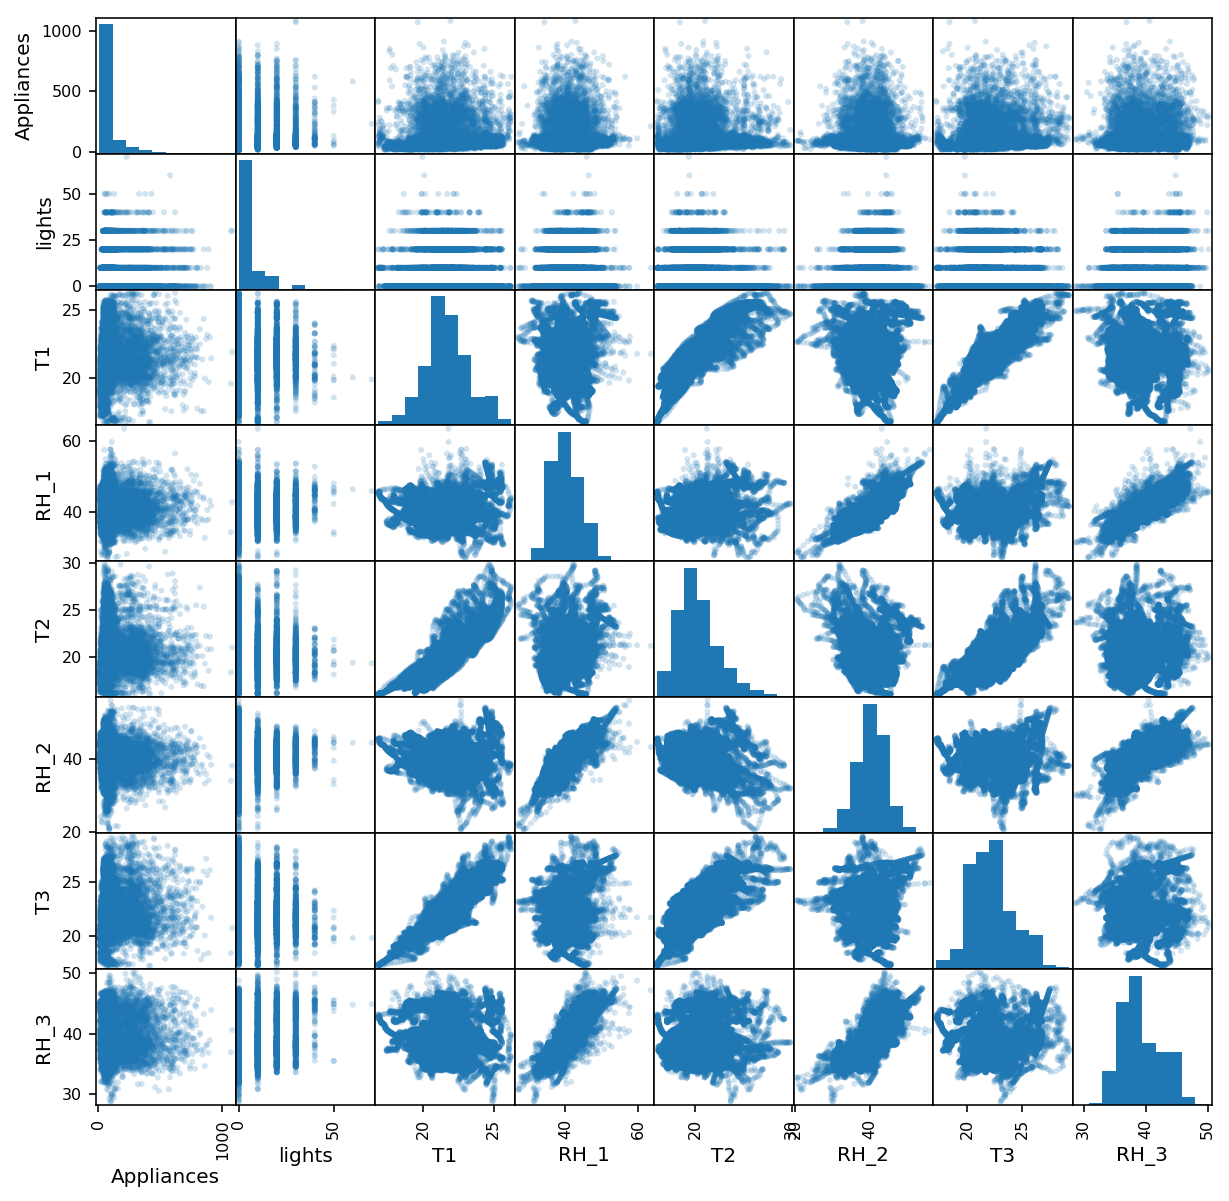

In [34]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Pair plots for T1, RH_1, T2, RH_2, T3, RH_3, Appliances and Lights')

try :
    
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter_matrix(indoor_temp_data_1[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']], alpha = 0.2, diagonal = 'hist', ax = ax)

except :
    logging.ERROR("Failed to show the plots")  


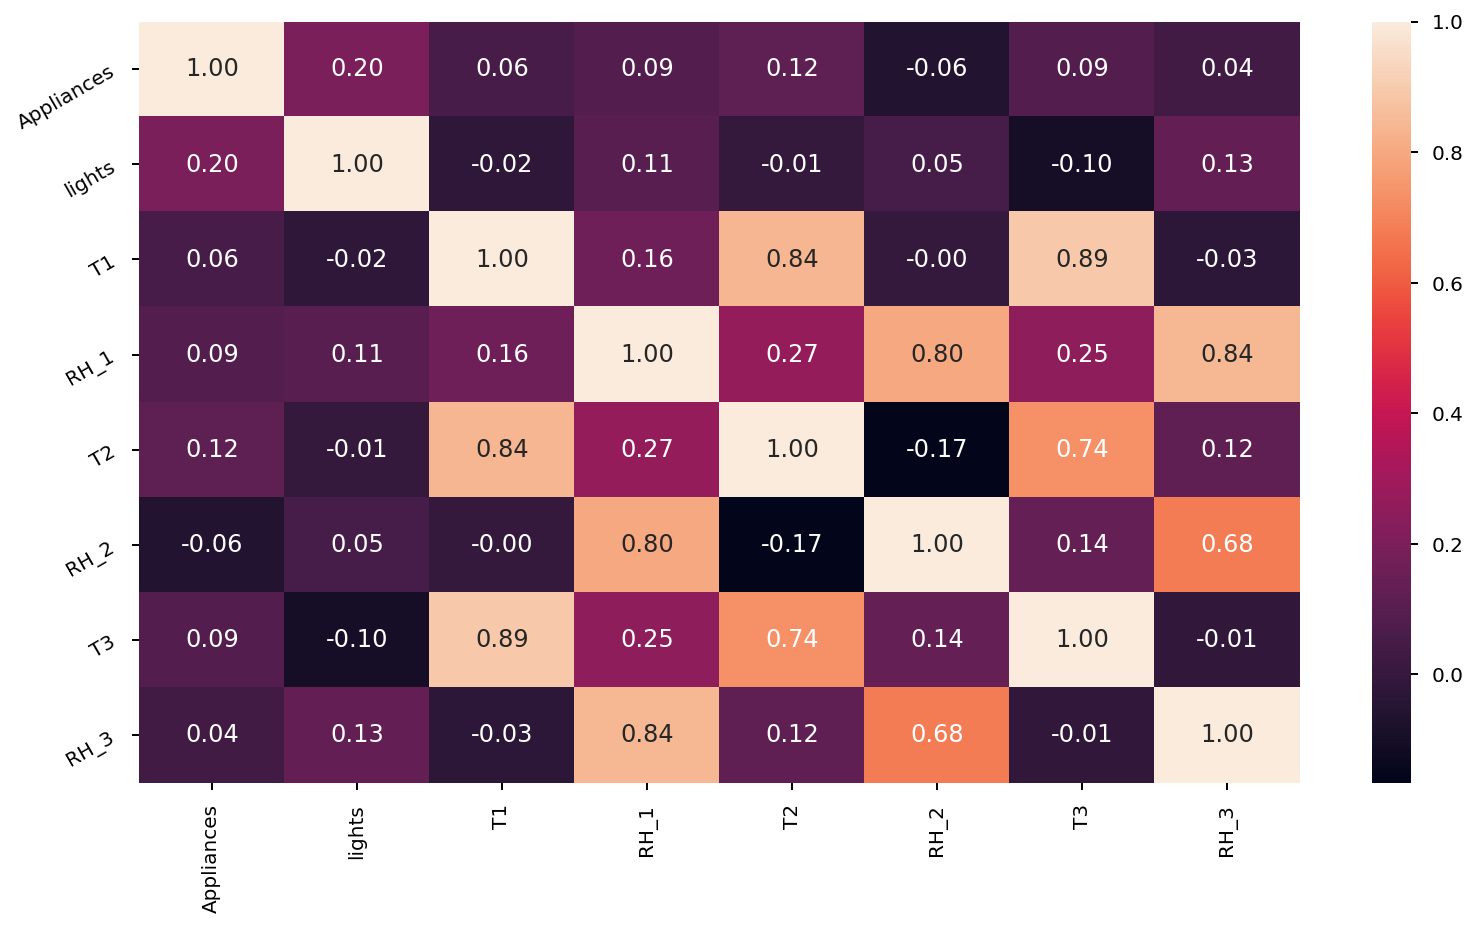

In [36]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Heat map for T1, RH_1, T2, RH_2, T3, RH_3, Appliances and Lights')

try :
    
    correlation =indoor_temp_data_1.corr()
    sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
    plt.figure(figsize=(13, 7))
    a = sns.heatmap(correlation,annot = True, fmt = '.2f')

    rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
    roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

except :
    logging.ERROR("Failed to show the plots")  




<p>
The above 2 figures shows the Relationship between the energy consumption of appliances with: lights, T1, RH_1, T2, RH_2, T3, RH_3. T1 and RH_1 correspond to the kitchen conditions, T2 and RH_2 corrspond to the living room conditions and T3 and RH_3 correspond to the laundry room area.<p>

#### Observation

The figure shows that there is a positive correlation between Appliances and lights(0.19), The highest correlation is between Appliances and T2(living room temp), There is also negative correlation between the Appliances and RH_2 (humidity). 

In [51]:
data_1 = data[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6']]

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':
C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


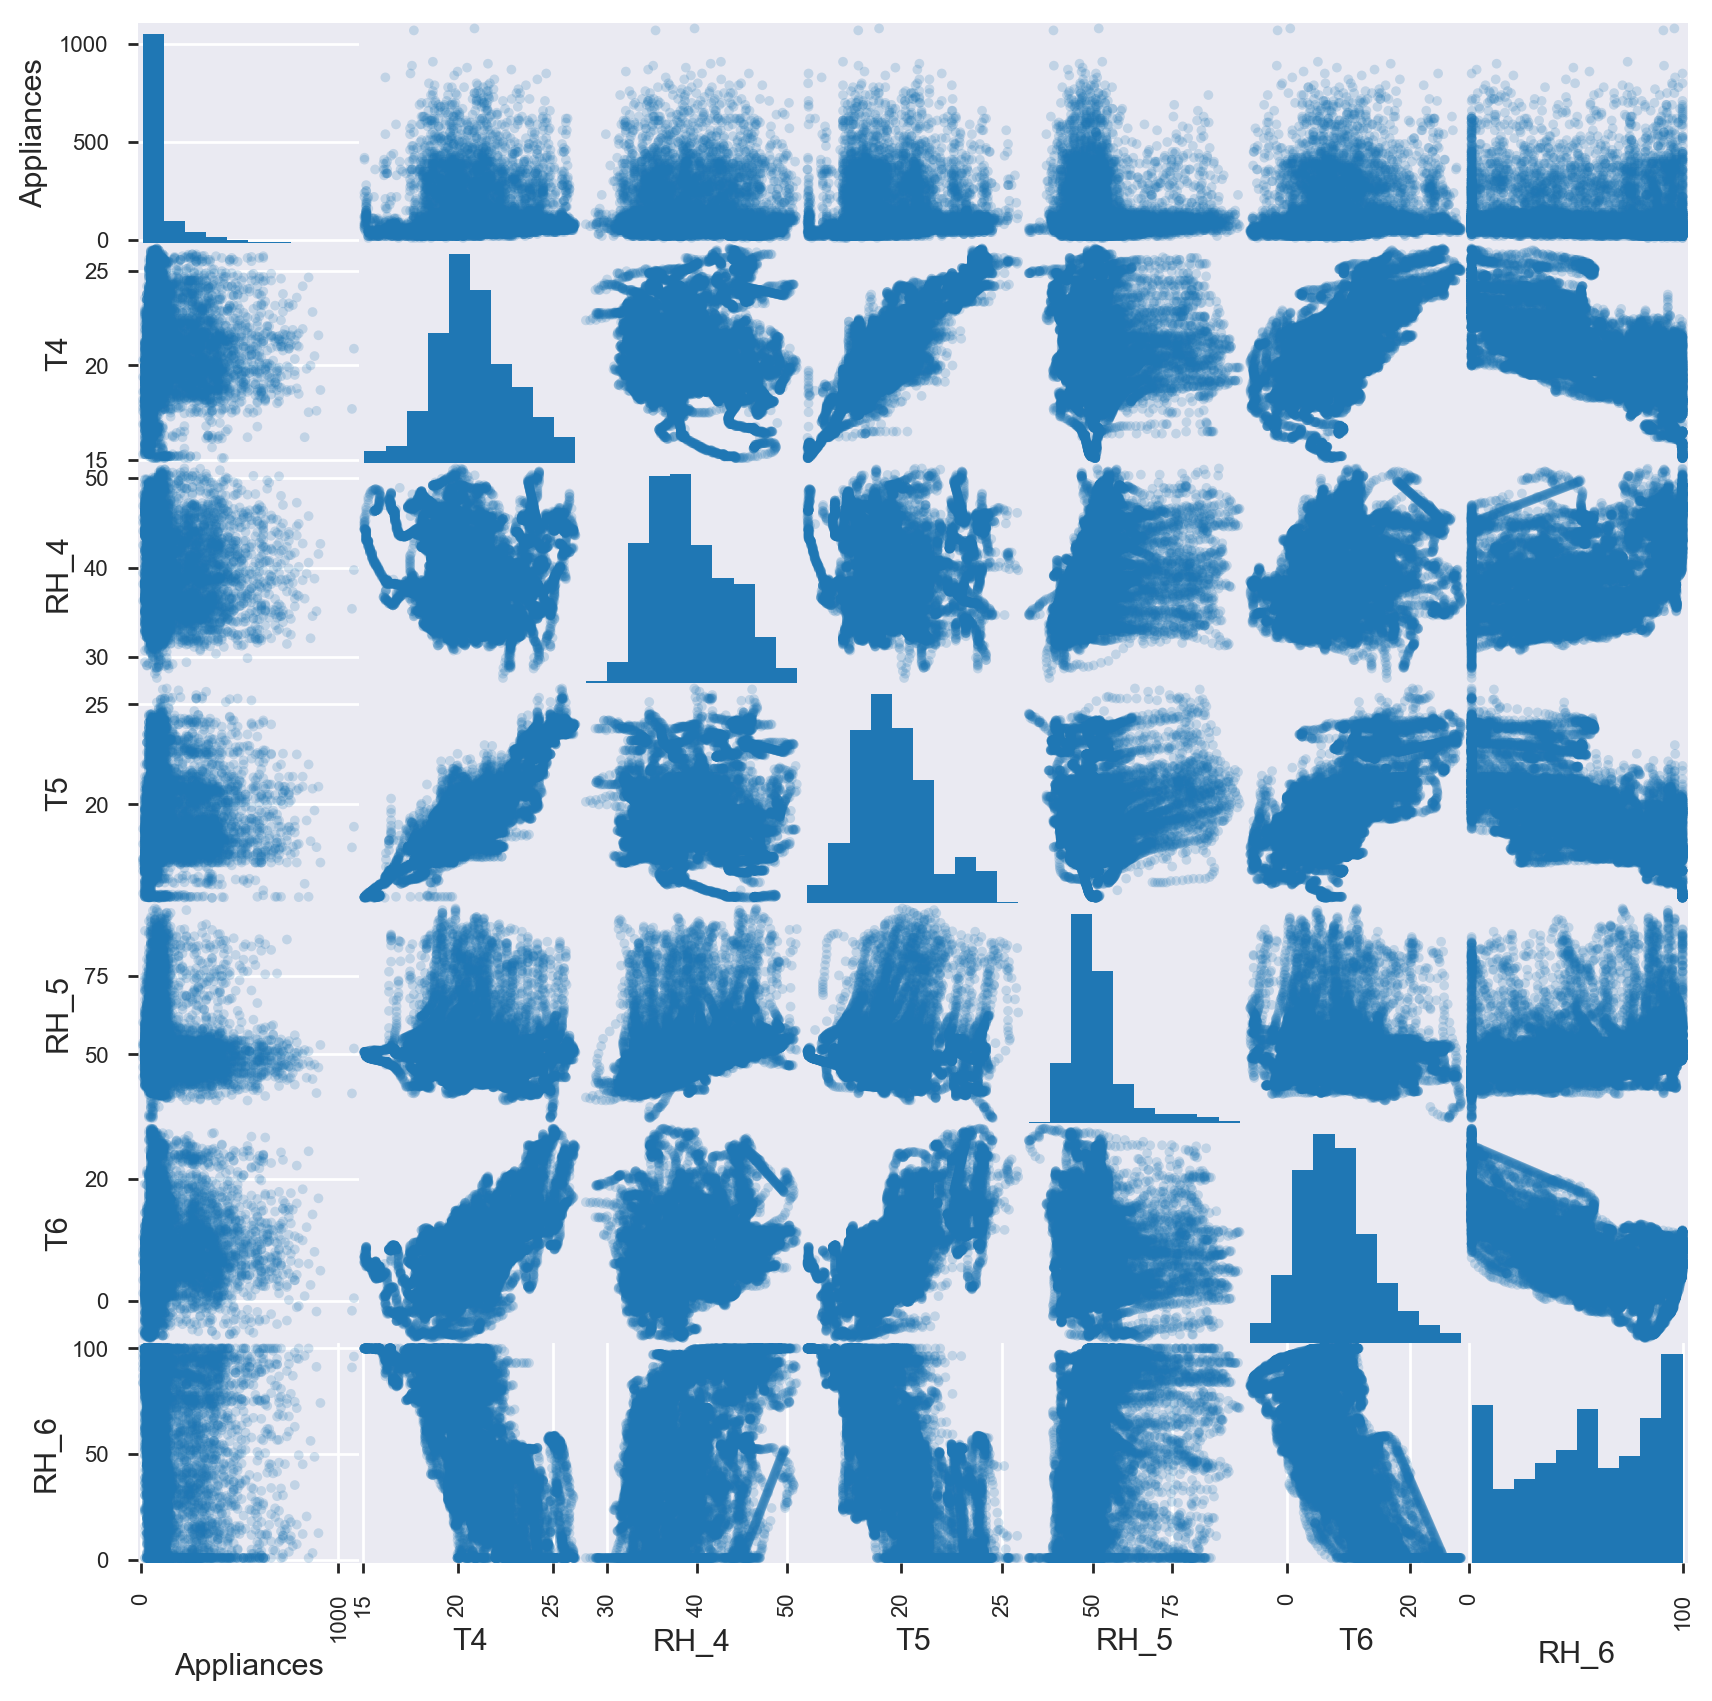

In [52]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Pair plots for T4, RH_4, T5, RH_5, T6, RH_6 and Appliances ')

try :
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter_matrix(data_1[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6' ]], alpha = 0.2, diagonal = 'hist', ax = ax)
except :
    logging.ERROR("Failed to show the Pair plots for T4, RH_4, T5, RH_5, T6, RH_6 and Appliances ")  


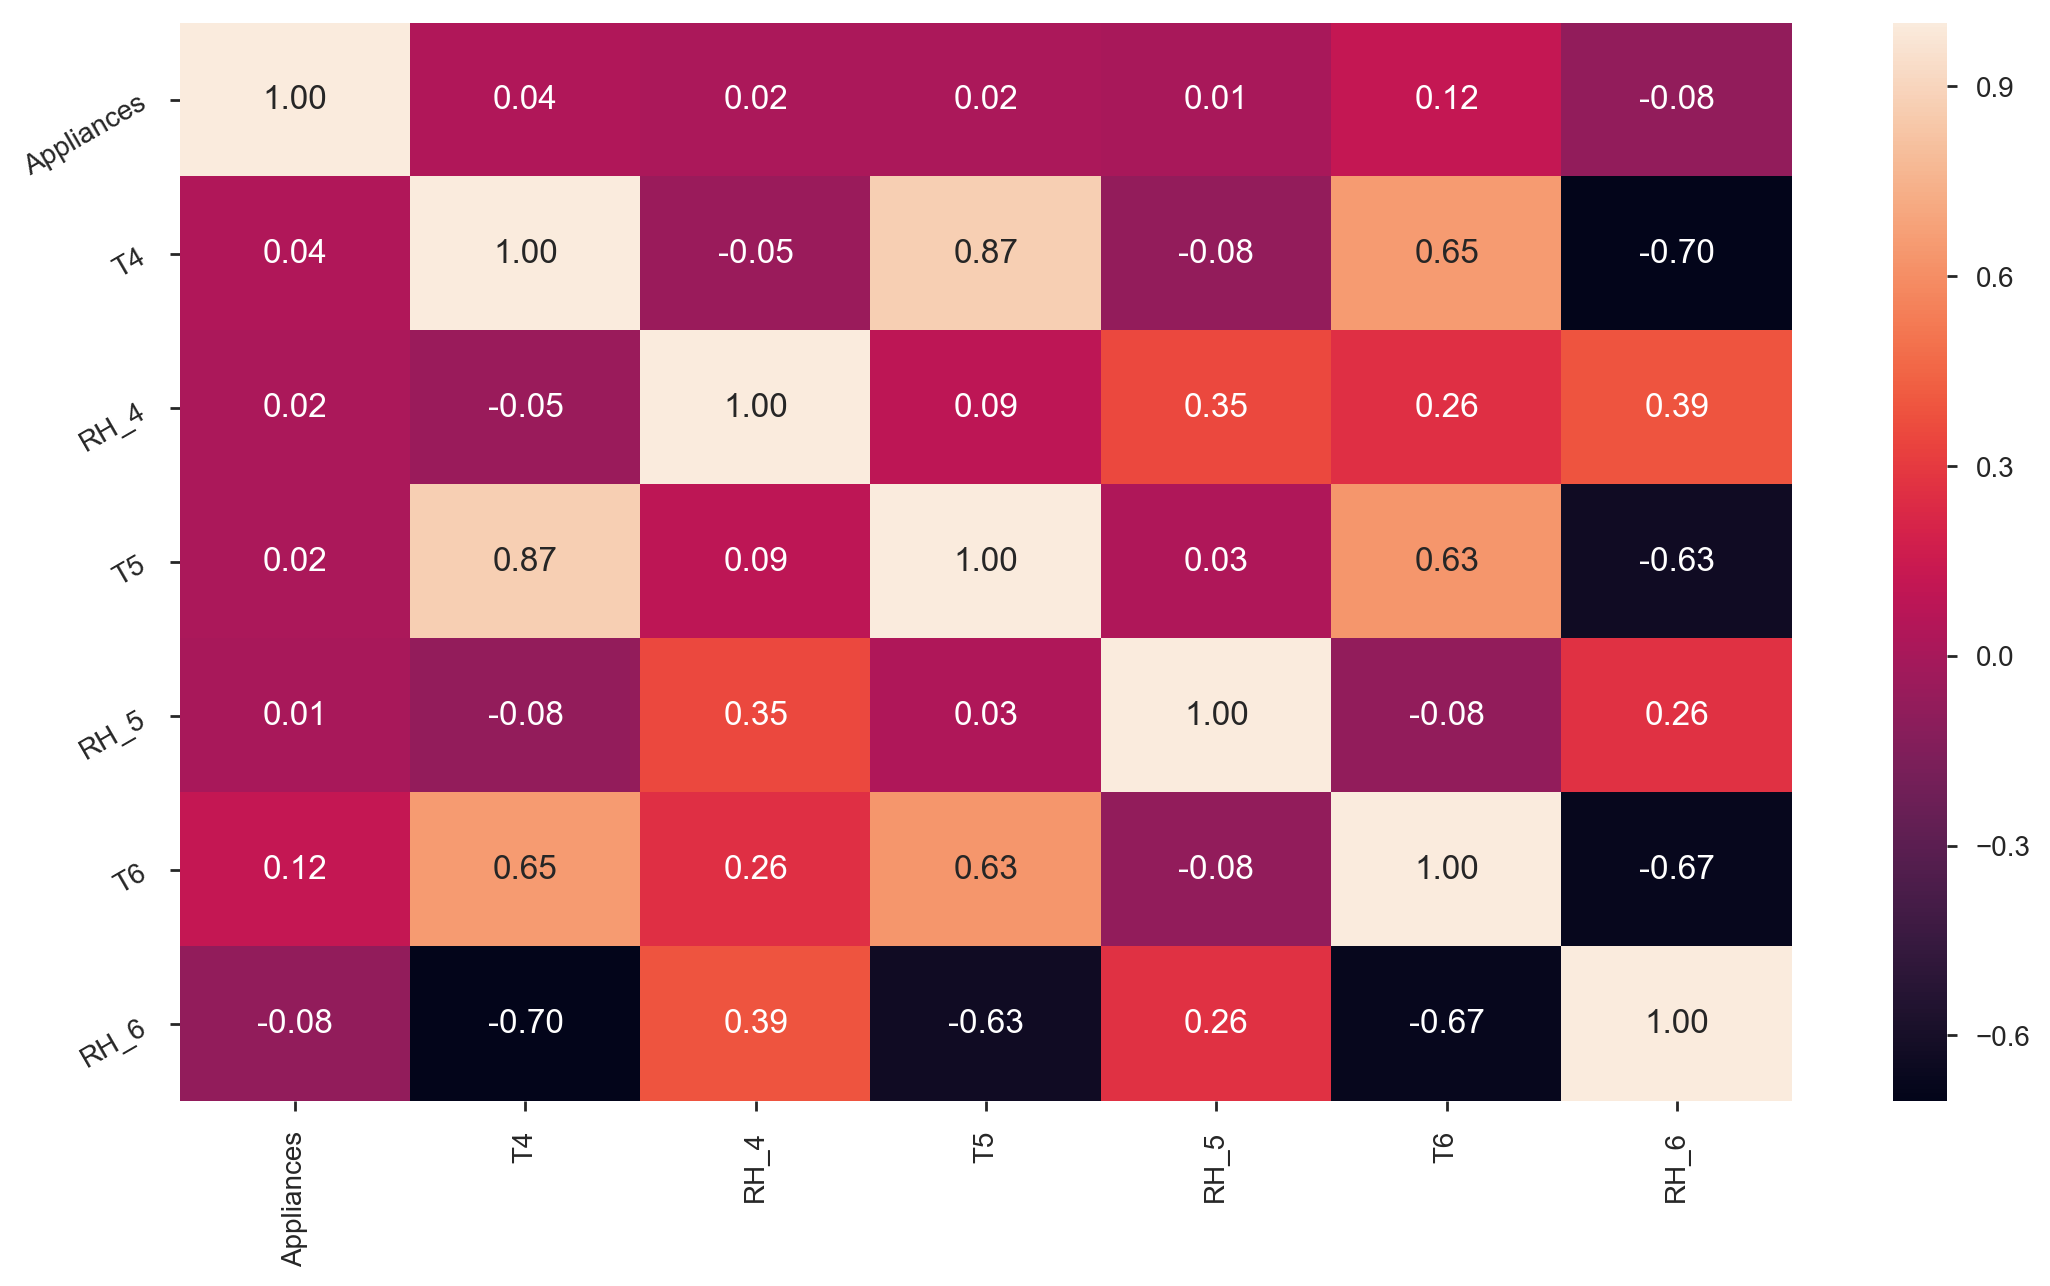

In [53]:


logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Heat map for T4, RH_4, T5, RH_5, T6, RH_6 and Appliances ')

try :
    correlation1 = data_1.corr()
    sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
    plt.figure(figsize=(13, 7))
    a = sns.heatmap(correlation1,annot = True, fmt = '.2f')

    rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
    roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

except :
    logging.ERROR("Failed to show the Heat map of T4, RH_4, T5, RH_5, T6, RH_6 and Appliances ")  



<p>The above figures shows the Relationship between the energy consumption of appliances with: lights, T4, RH_4, T5, RH_5, T6, RH_6. T4 and RH_4 correspond to the office room conditions, T5 and RH_5 corrspond to the bathroom conditions and T6 and RH_6 correspond to the Temperature and Humidity outside the building.<p>

### Observation

The figure shows that there is a positive correlation between Appliances and  T4, T5, T6, RH_4, RH_5. The highest correlation is between Appliances and T6(outside temp), There is also negative correlation between the Appliances and RH_6 (humidity).

In [40]:
room_temp = data[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']]

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if sys.path[0] == '':
C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if sys.path[0] == '':


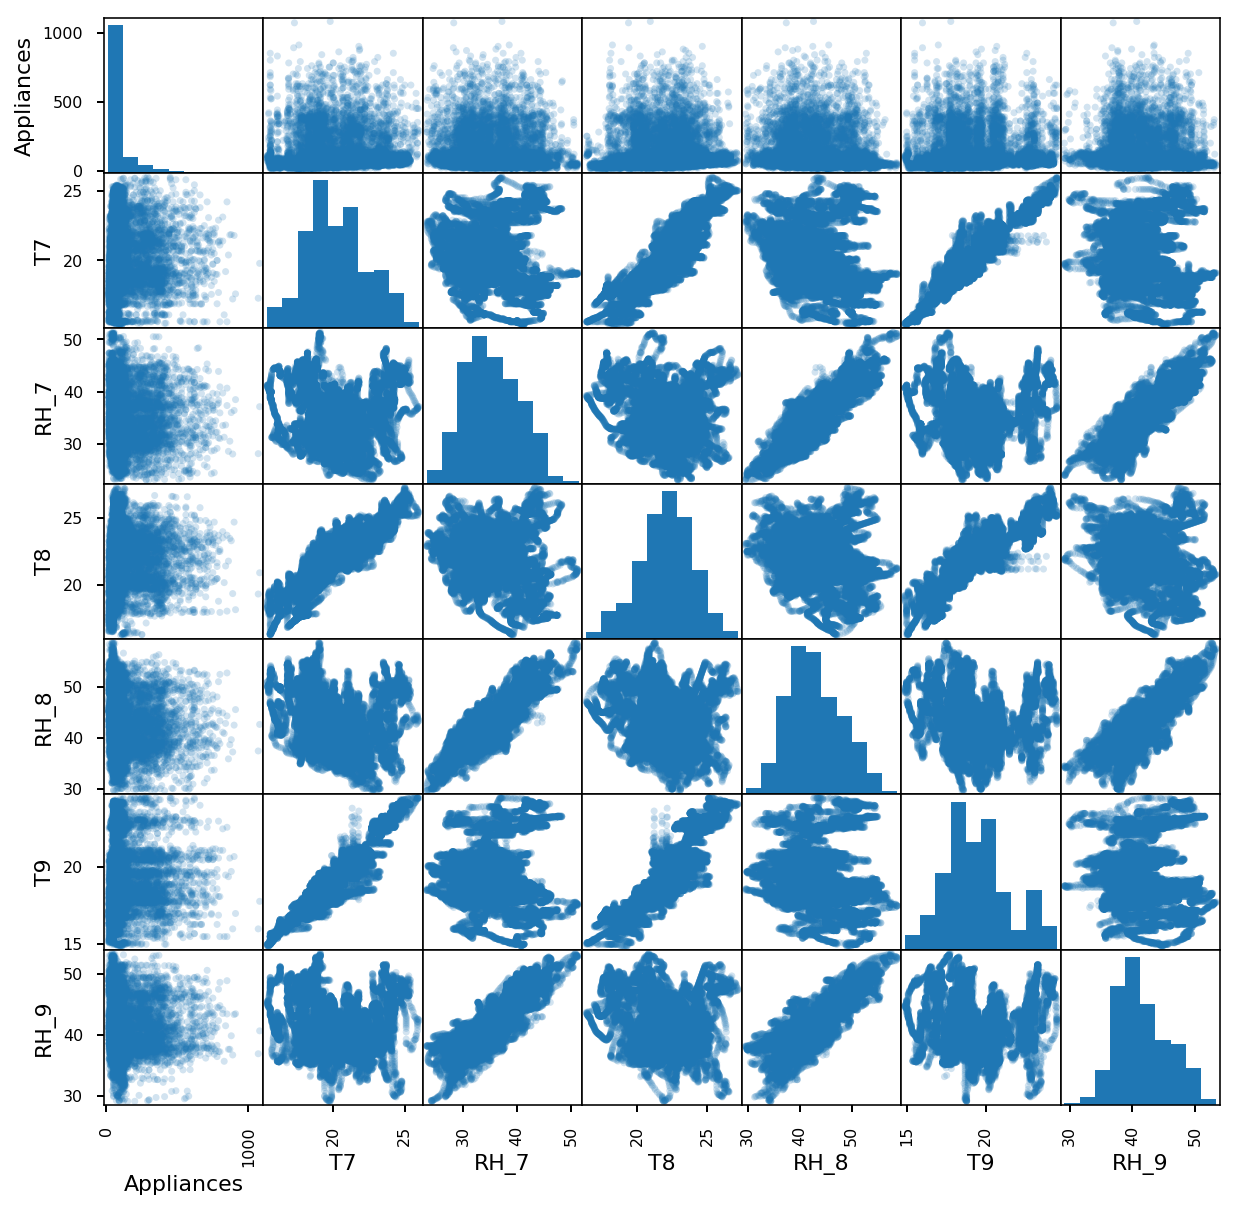

In [41]:


logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Pair plot for T7, RH_7, T8, RH_8, T9, RH_9and Appliances ')

try :

    fig, ax = plt.subplots(figsize=(10, 10))
    scatter_matrix(room_temp[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9' ]], alpha = 0.2, diagonal = 'hist', ax = ax)

except :
    logging.ERROR("Failed to show the pair plot of T7, RH_7, T8, RH_8, T9, RH_9 and Appliances ")  



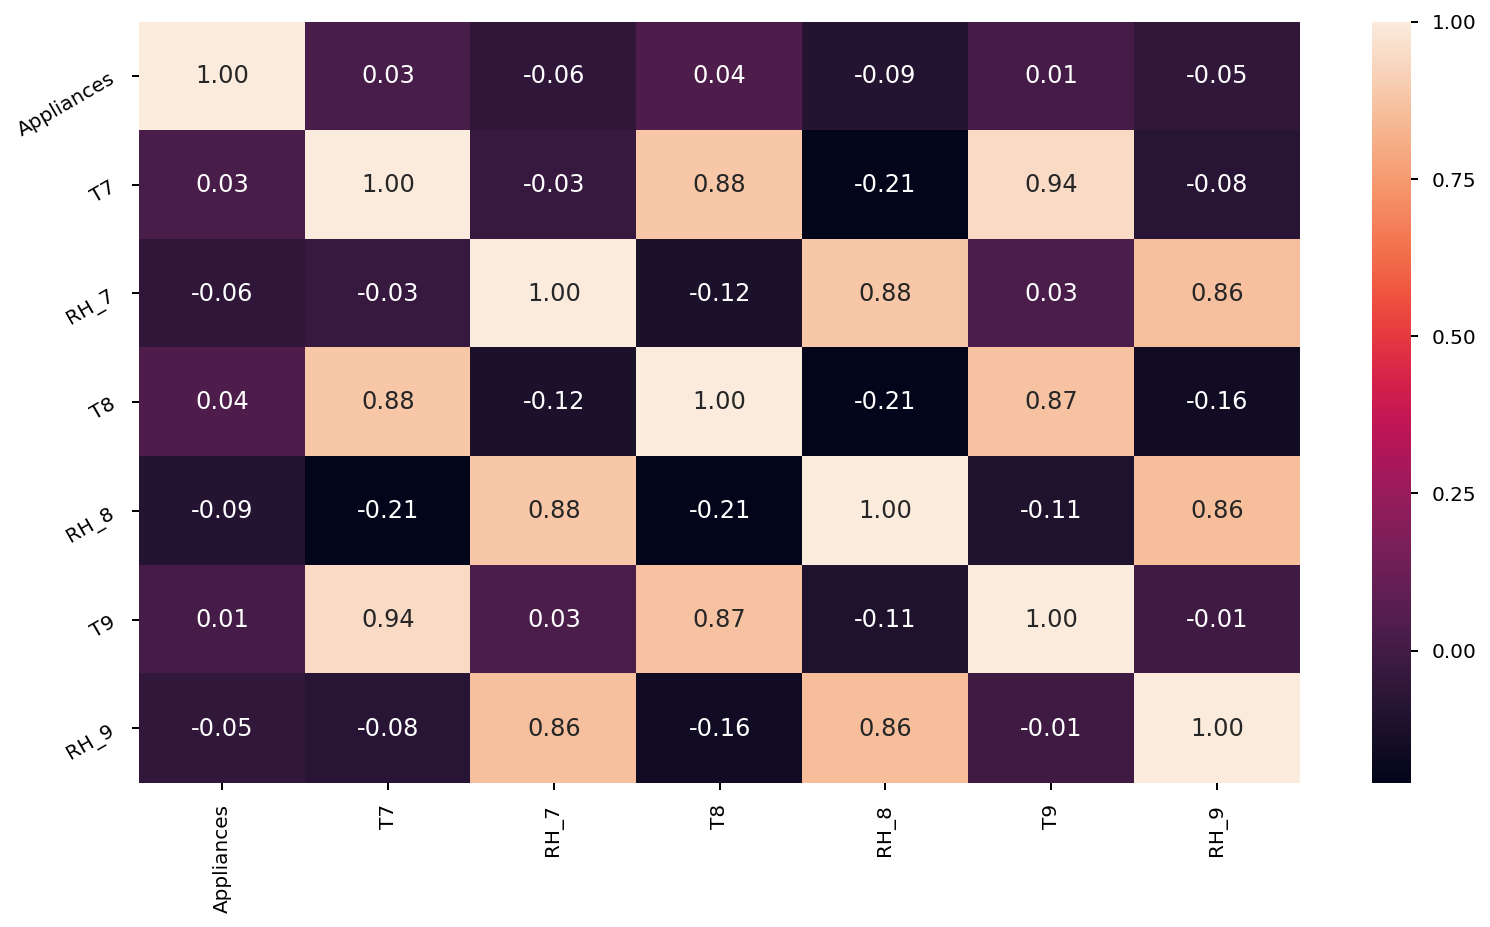

In [42]:



logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Heat map for T7, RH_7, T8, RH_8, T9, RH_9and Appliances ')

try :
    correlation2 = room_temp.corr()
    sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
    plt.figure(figsize=(13, 7))
    a = sns.heatmap(correlation2,annot = True, fmt = '.2f')

    rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
    roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

except :
    logging.ERROR("Failed to show the Heat map of T7, RH_7, T8, RH_8, T9, RH_9 and Appliances ")  



<p>The above figure shows the Relationship between the energy consumption of appliances with: lights, T7, RH_7, T8, RH_8, T9, RH_9. T7 and RH_7 correspond to the ironing room conditions, T8 and RH_8 corrspond to the teenager room conditions and T9 and RH_9 correspond to the parents room condition.<p>

### Observation

The figure shows that there is a positive correlation between Appliances and T7, T8, T9, RH_9. The highest correlation is between Appliances and T8 (Teenager room temp), There is also negative correlation between the Appliances and RH_7, RH_8 and RH_9 (humidity in all the rooms).

In [43]:
outside_temp = data[['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM', 'T6']]

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if sys.path[0] == '':
C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if sys.path[0] == '':


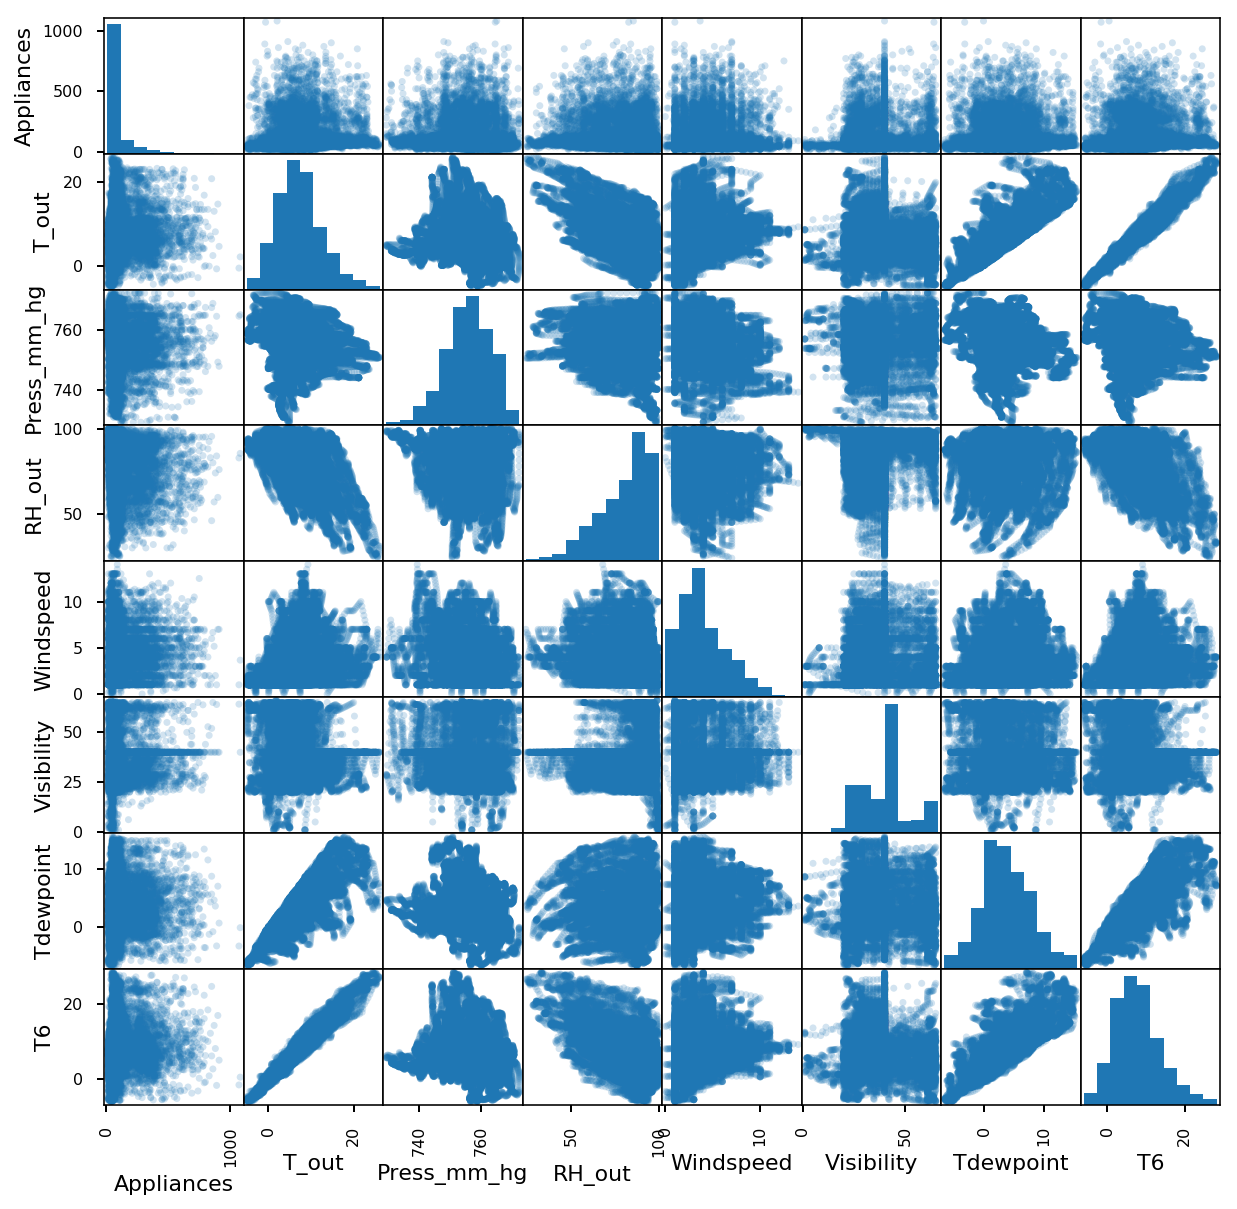

In [44]:



logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Heat map for T7, RH_7, T8, RH_8, T9, RH_9and Appliances ')

try :
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter_matrix(outside_temp [['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM', 'T6' ]], alpha = 0.2, diagonal = 'hist', ax = ax)
except :
    logging.ERROR("Failed to show the Heat map of T7, RH_7, T8, RH_8, T9, RH_9 and Appliances ")  



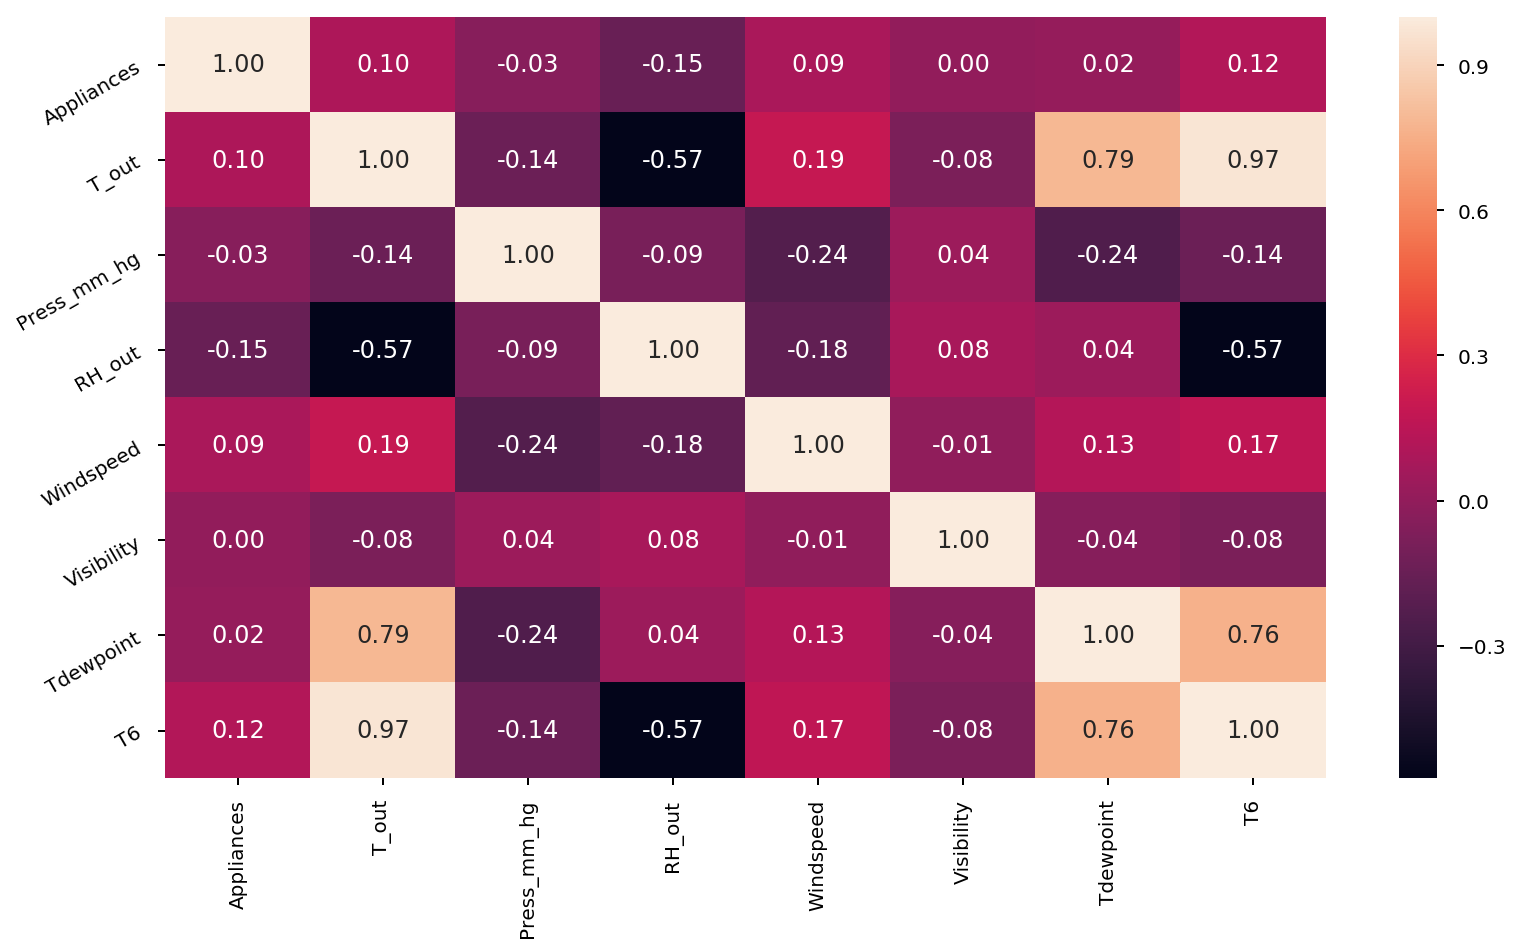

In [45]:



logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Heat map for T_out, RH_out, Press, Windspeed, Visibility, Tdewpoint, T6 and Appliances ')

try :
    correlation = outside_temp.corr()
    sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
    plt.figure(figsize=(13, 7))
    a = sns.heatmap(correlation,annot = True, fmt = '.2f')

    rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
    roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
    
except :
    logging.ERROR("Failed to show the Heat map of T_out, RH_out, Press, Windspeed, Visibility, Tdewpoint, T6 and Appliances ")  


<p>The above figure shows the Relationship between the energy consumption of appliances with: T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, NSM ans T6. All these variables correspond to the Temperature, Pressure and Humidity, respectively, from Chièvres weather station. NSM correspond to Number of seconds from Midnight. T6 correspond to the temp outside the building<p>

### Observation

The figure shows that there is a positive correlation between Appliances and T_out, Windspeed, Tdewpoint, NSM and T6. The highest correlation is between Appliances and T6 (Temp outside the building), There is also negative correlation between the Appliances and Pressure(Press_mm_hg), Humidity(RH_out).

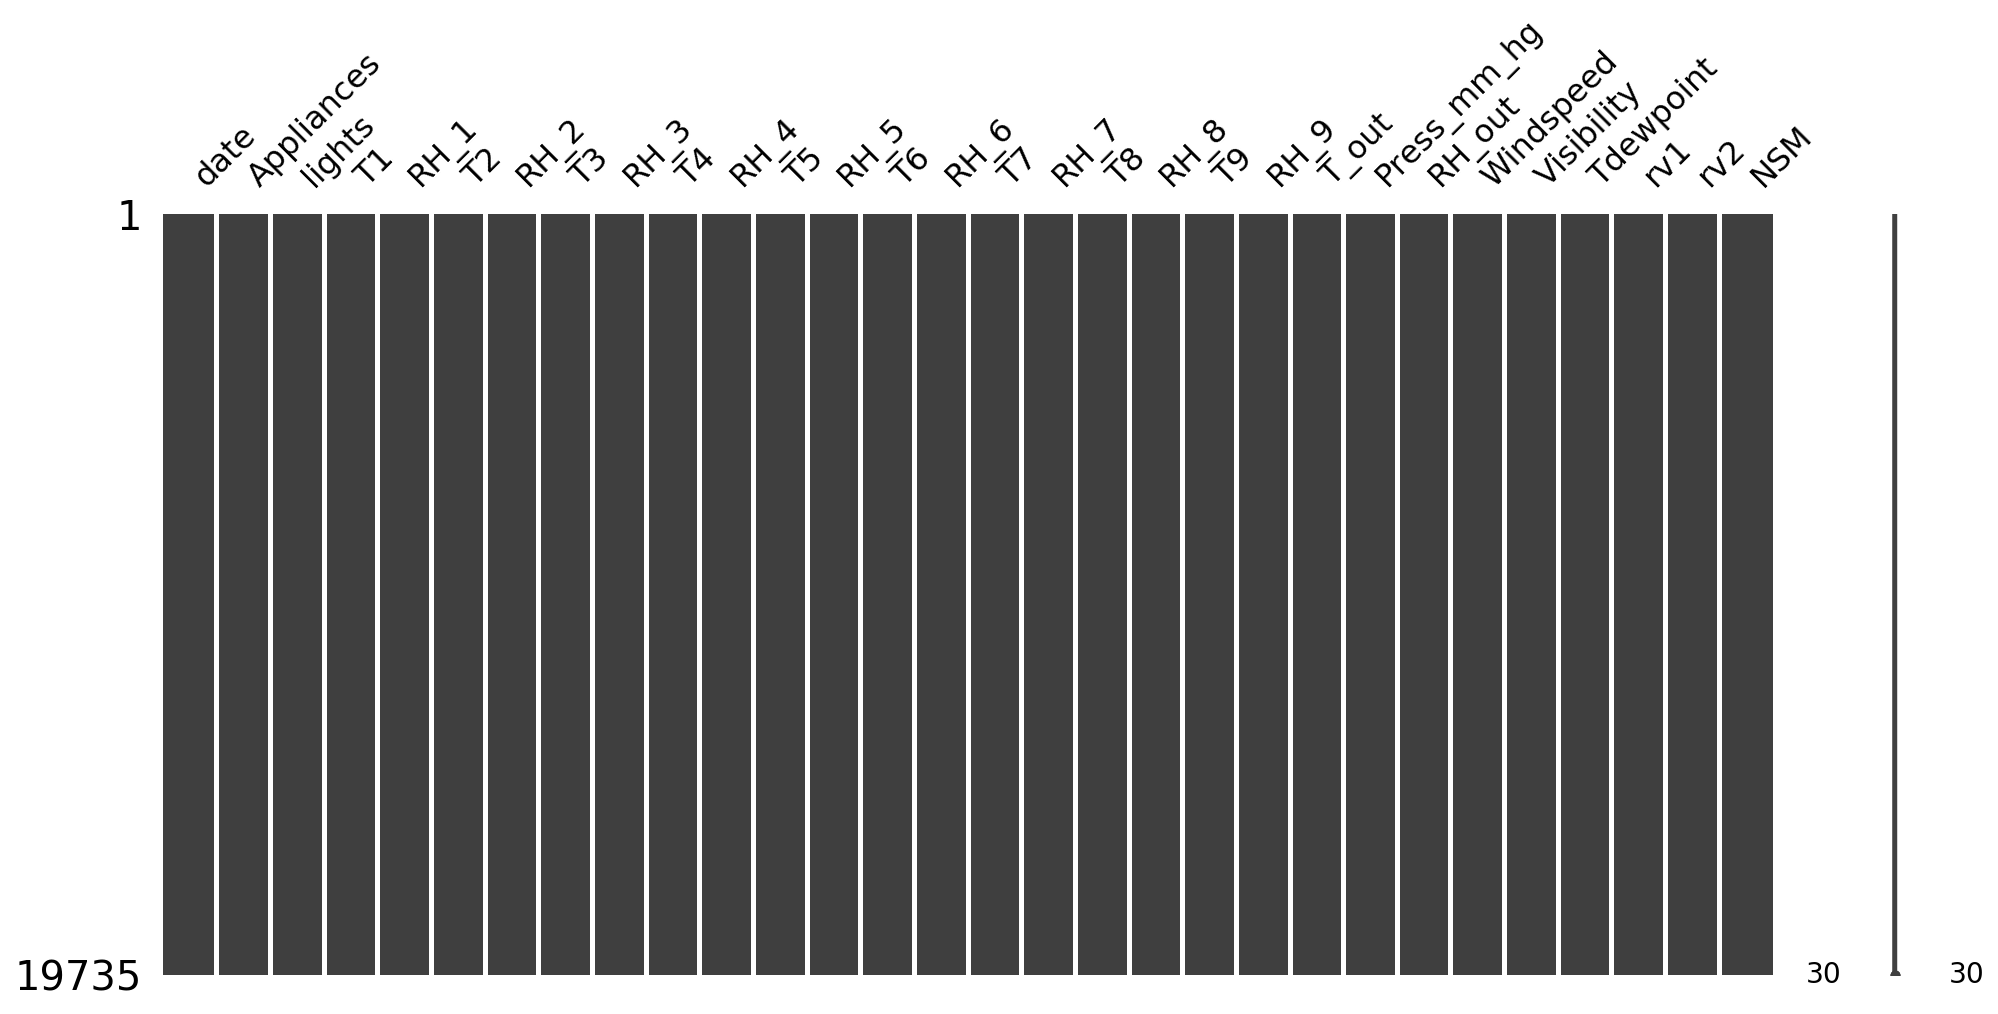

In [46]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Checking any Missing Value ')

try :
    msno.matrix(data, figsize = (16, 7), )
    
except :
    logging.ERROR("Failed to show the missing plot graph ")  



In [60]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Creating table using pivottable ')

from pivottablejs import pivot_ui
pivot_ui(data)
    


In [62]:
pandas_profiling.ProfileReport(data)

### Box Plots

In [35]:
# Version check
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print( __version__) # requires version >= 1.9.0

2.4.1


In [36]:
#plot your graphs offline inside a Jupyter Notebook Environment. First you need to initiate the Plotly Notebook mode as below:
init_notebook_mode(connected=True)
# Run at the start of every ipython notebook to use plotly.offline. This injects the plotly.js source files into the notebook.

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(x = data['Appliances'])
data_box = [trace0]
py.iplot(data_box)

{'boxes': [<matplotlib.lines.Line2D at 0x24b7dd8deb8>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7dd0a400>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7dc234a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7dc46e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7dd77588>,
  <matplotlib.lines.Line2D at 0x24b7dd63ba8>]}

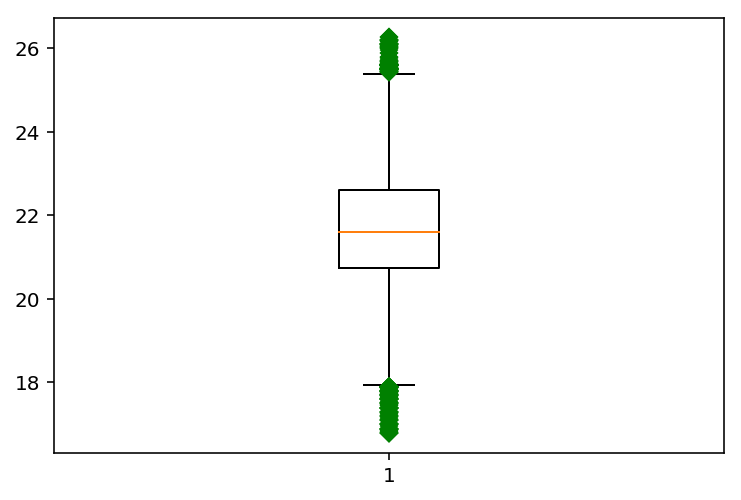

In [48]:
plt.figure()
plt.boxplot(data['T1'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7c828e48>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7c7cef60>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7d004a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7d038a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7c8287f0>,
  <matplotlib.lines.Line2D at 0x24b7c828a20>]}

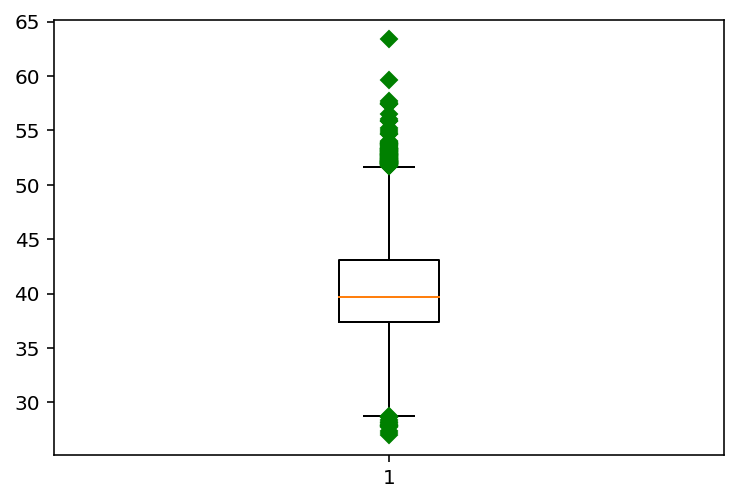

In [49]:
plt.figure()
plt.boxplot(data['RH_1'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b770eb4a8>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7874d898>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b784da978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b784dadd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7871edd8>,
  <matplotlib.lines.Line2D at 0x24b7874dfd0>]}

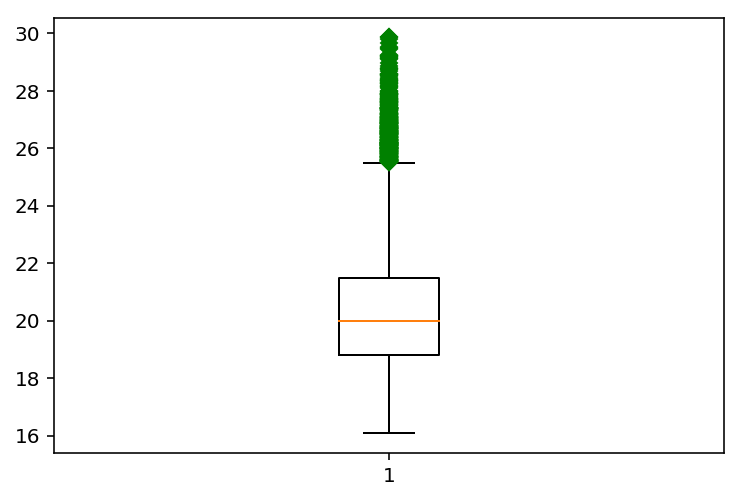

In [50]:
plt.figure()
plt.boxplot(data['T2'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7f527ef0>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7f4f8940>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7c850080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7f74fc88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7f5272b0>,
  <matplotlib.lines.Line2D at 0x24b7f5276d8>]}

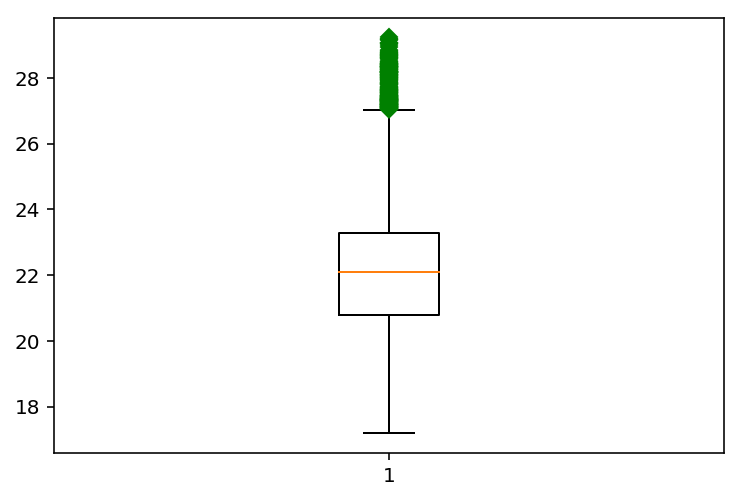

In [51]:
plt.figure()
plt.boxplot(data['T3'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7c9fdc18>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7ca06668>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7ca0b320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7ca06eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7c9fdd68>,
  <matplotlib.lines.Line2D at 0x24b7ca06240>]}

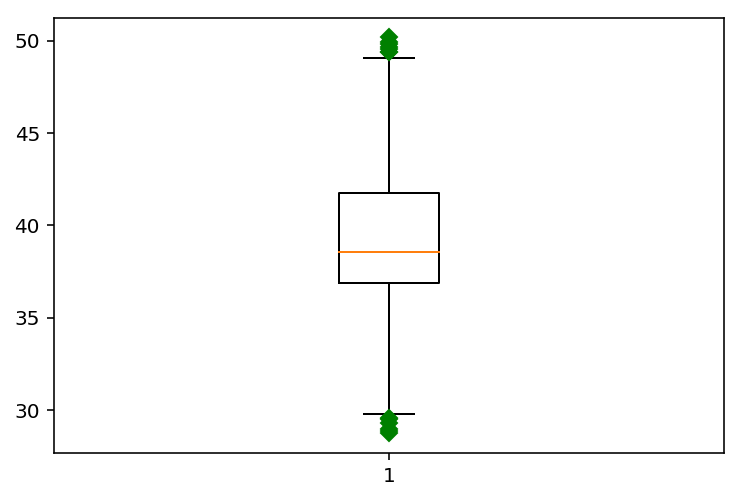

In [52]:
plt.figure()
plt.boxplot(data['RH_3'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7cd41940>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7cd49390>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7cd53048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7cd49be0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7cd41a90>,
  <matplotlib.lines.Line2D at 0x24b7cd41f28>]}

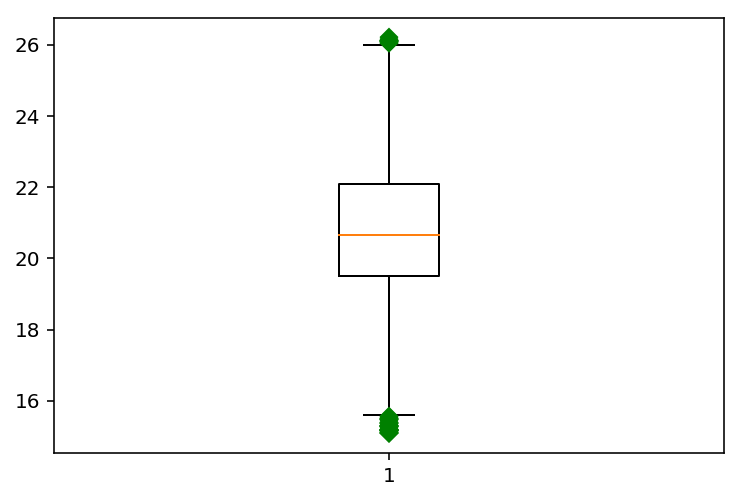

In [53]:
plt.figure()
plt.boxplot(data['T4'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7f6d0c18>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7f6d9668>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7f6e2320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7f6d9eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7f6d0d68>,
  <matplotlib.lines.Line2D at 0x24b7f6d9240>]}

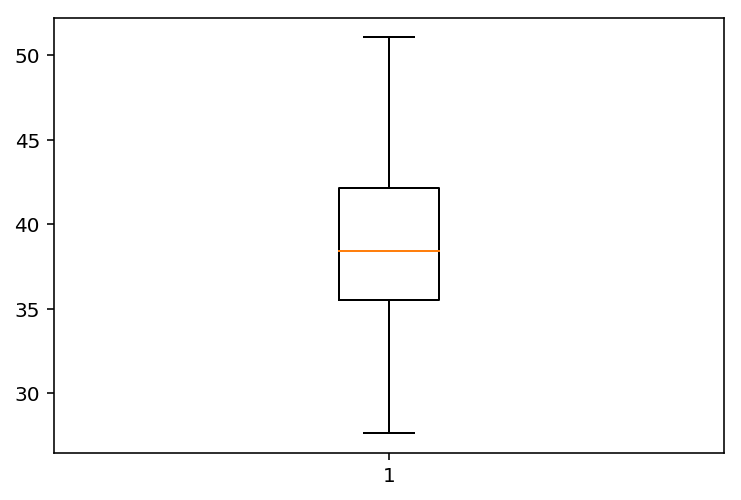

In [54]:
plt.figure()
plt.boxplot(data['RH_4'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7f8ffac8>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7f908518>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7f9111d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7f908d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7f8ffc18>,
  <matplotlib.lines.Line2D at 0x24b7f9080f0>]}

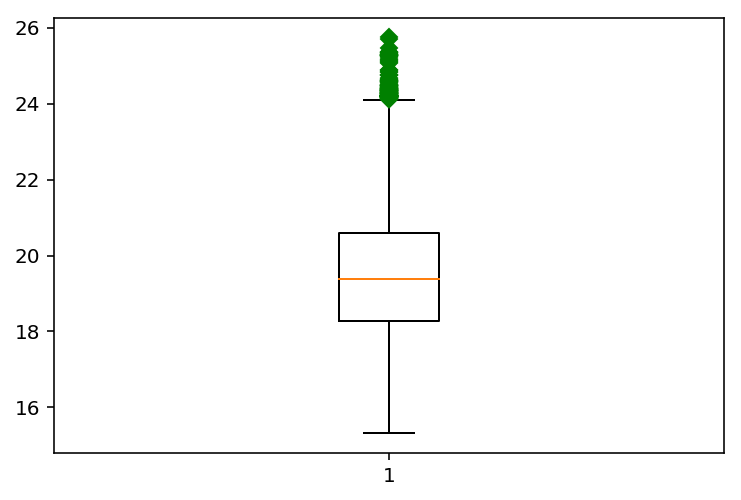

In [55]:
plt.figure()
plt.boxplot(data['T5'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7fc81d68>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7fc897b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7fc91470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7fc91048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7fc81eb8>,
  <matplotlib.lines.Line2D at 0x24b7fc89390>]}

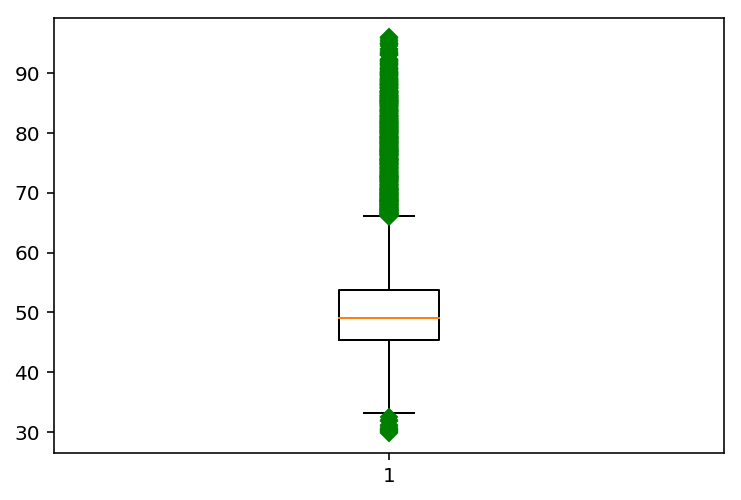

In [56]:
plt.figure()
plt.boxplot(data['RH_5'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7fce7588>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7fce7f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7fcf0c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7fcf0828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7fce76d8>,
  <matplotlib.lines.Line2D at 0x24b7fce7b70>]}

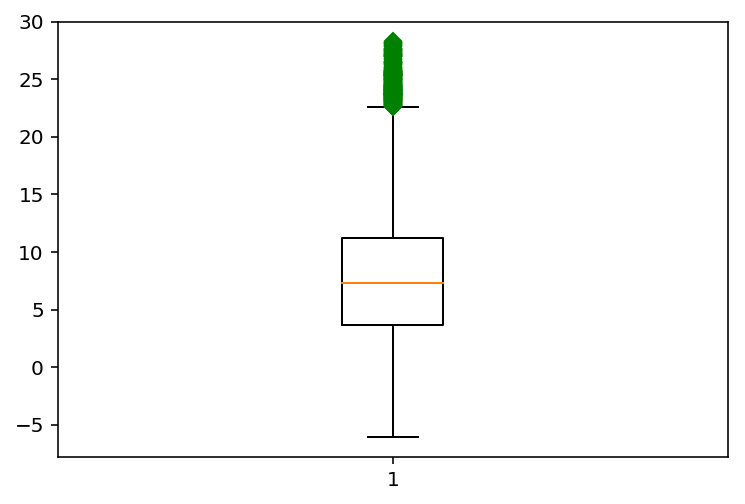

In [57]:
plt.figure()
plt.boxplot(data['T6'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7fd53128>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7fd53b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7fd597f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7fd593c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7fd53278>,
  <matplotlib.lines.Line2D at 0x24b7fd53710>]}

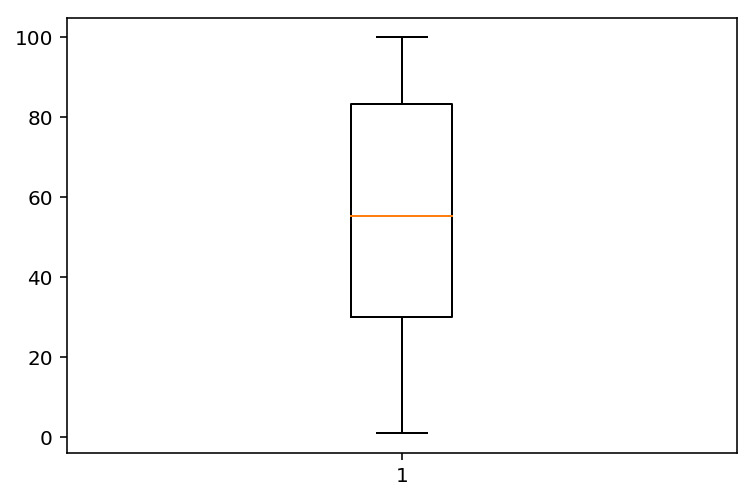

In [58]:
plt.figure()
plt.boxplot(data['RH_6'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b7fdb32e8>],
 'caps': [<matplotlib.lines.Line2D at 0x24b7fdb3cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b7fdb89b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b7fdb8588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b7fdb3438>,
  <matplotlib.lines.Line2D at 0x24b7fdb38d0>]}

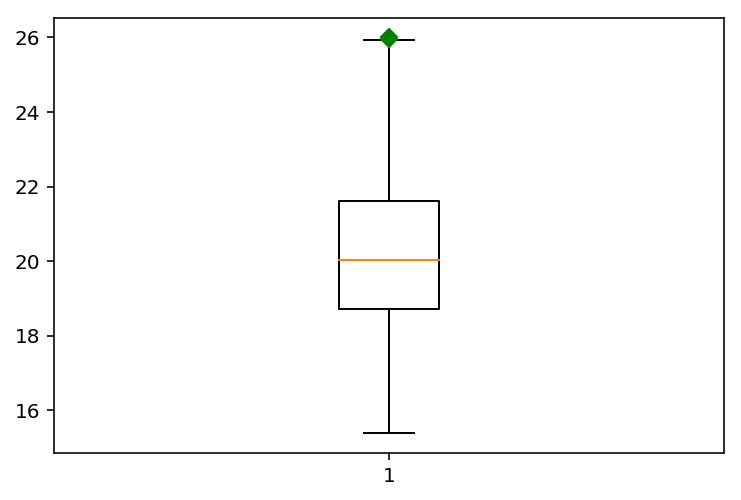

In [59]:
plt.figure()
plt.boxplot(data['T7'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b00a71630>],
 'caps': [<matplotlib.lines.Line2D at 0x24b00a79080>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b00a79cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b00a798d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b00a71780>,
  <matplotlib.lines.Line2D at 0x24b00a71c18>]}

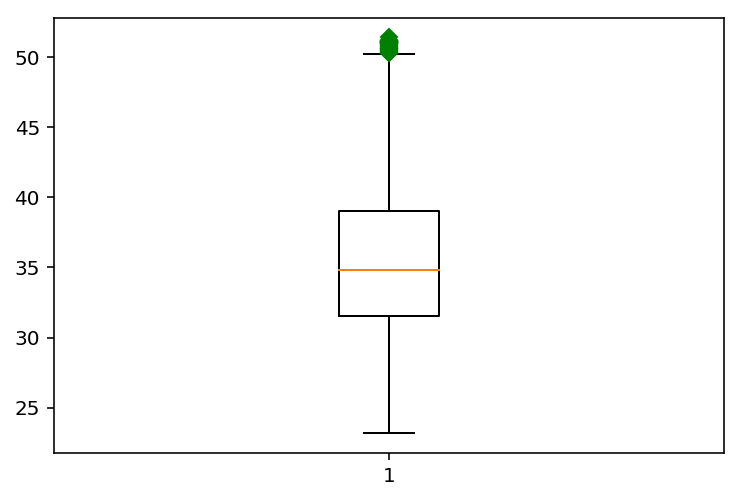

In [60]:
plt.figure()
plt.boxplot(data['RH_7'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b00ad09b0>],
 'caps': [<matplotlib.lines.Line2D at 0x24b00ad8400>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b00ae10b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b00ad8c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b00ad0b00>,
  <matplotlib.lines.Line2D at 0x24b00ad0f98>]}

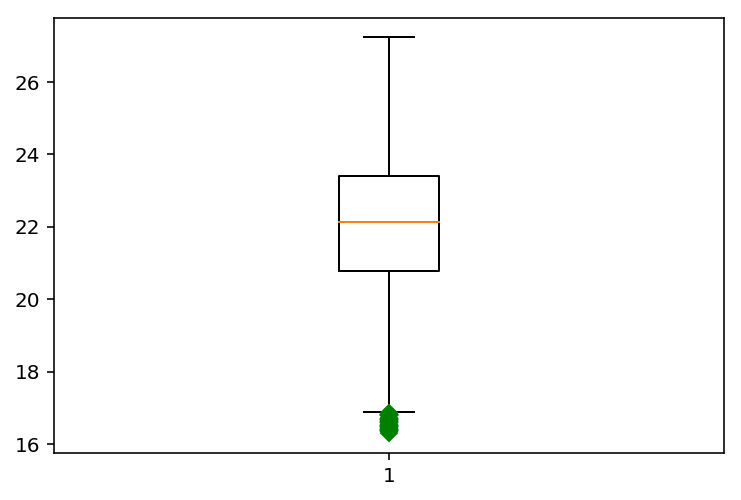

In [61]:
plt.figure()
plt.boxplot(data['T8'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b00b30c88>],
 'caps': [<matplotlib.lines.Line2D at 0x24b00b396d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b00b41390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b00b39f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b00b30dd8>,
  <matplotlib.lines.Line2D at 0x24b00b392b0>]}

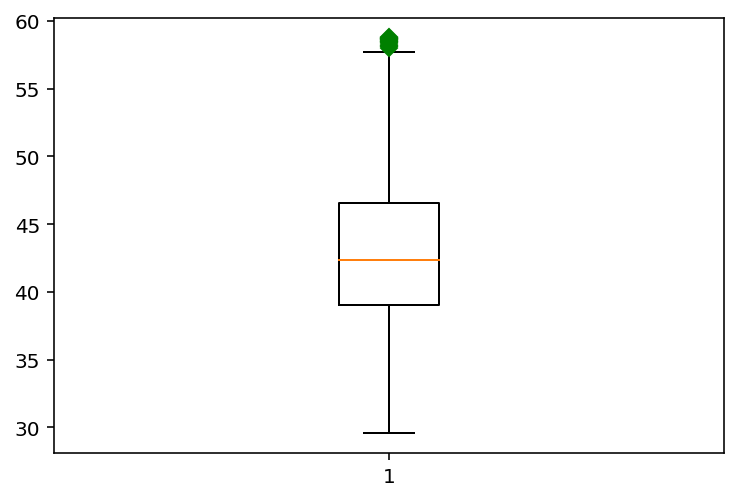

In [62]:
plt.figure()
plt.boxplot(data['RH_8'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b00b974a8>],
 'caps': [<matplotlib.lines.Line2D at 0x24b00b97eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b00b9db70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b00b9d748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b00b975f8>,
  <matplotlib.lines.Line2D at 0x24b00b97a90>]}

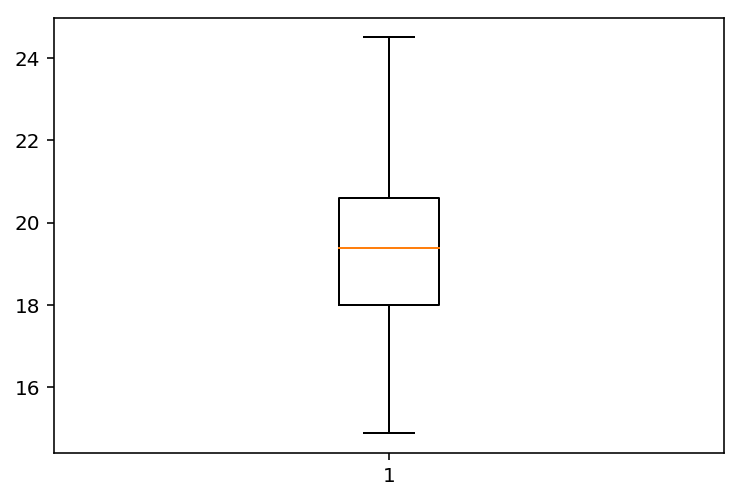

In [63]:
plt.figure()
plt.boxplot(data['T9'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b00bf7278>],
 'caps': [<matplotlib.lines.Line2D at 0x24b00bf7c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b00bfe940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b00bfe518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b00bf73c8>,
  <matplotlib.lines.Line2D at 0x24b00bf7860>]}

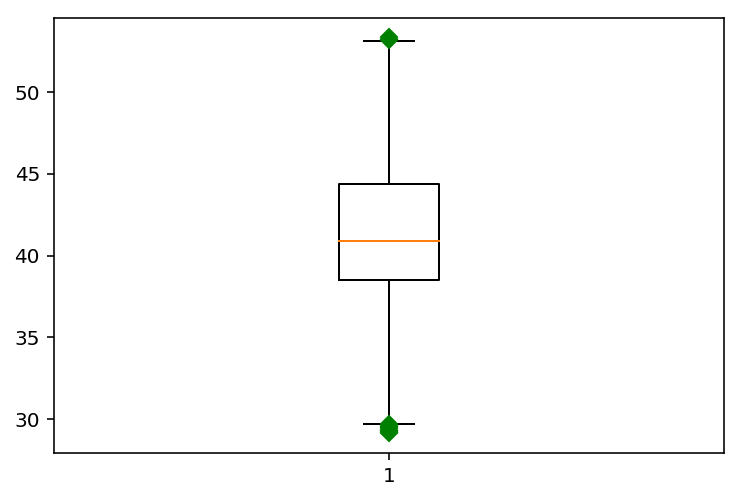

In [64]:
plt.figure()
plt.boxplot(data['RH_9'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b00fa05c0>],
 'caps': [<matplotlib.lines.Line2D at 0x24b00fa0fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b00faac88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b00faa860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b00fa0710>,
  <matplotlib.lines.Line2D at 0x24b00fa0ba8>]}

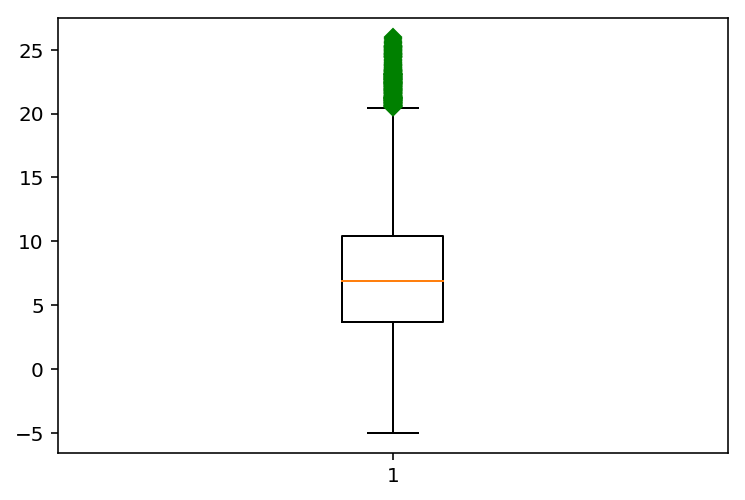

In [67]:
plt.figure()
plt.boxplot(data['T_out'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b0130cb38>],
 'caps': [<matplotlib.lines.Line2D at 0x24b01316588>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b0131e240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b01316dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b0130cc88>,
  <matplotlib.lines.Line2D at 0x24b01316160>]}

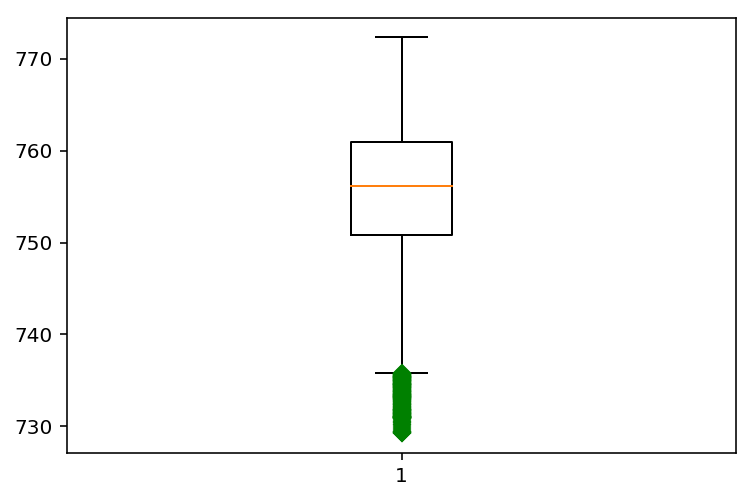

In [69]:
plt.figure()
plt.boxplot(data['Press_mm_hg'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b017da550>],
 'caps': [<matplotlib.lines.Line2D at 0x24b017daf60>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b017e0c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b017e07f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b017da6a0>,
  <matplotlib.lines.Line2D at 0x24b017dab38>]}

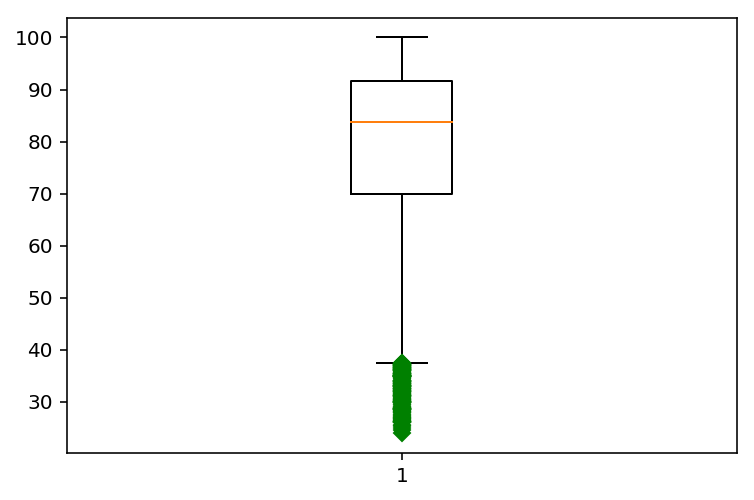

In [70]:
plt.figure()
plt.boxplot(data['RH_out'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b01840320>],
 'caps': [<matplotlib.lines.Line2D at 0x24b01840d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b018479e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b018475c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b01840470>,
  <matplotlib.lines.Line2D at 0x24b01840908>]}

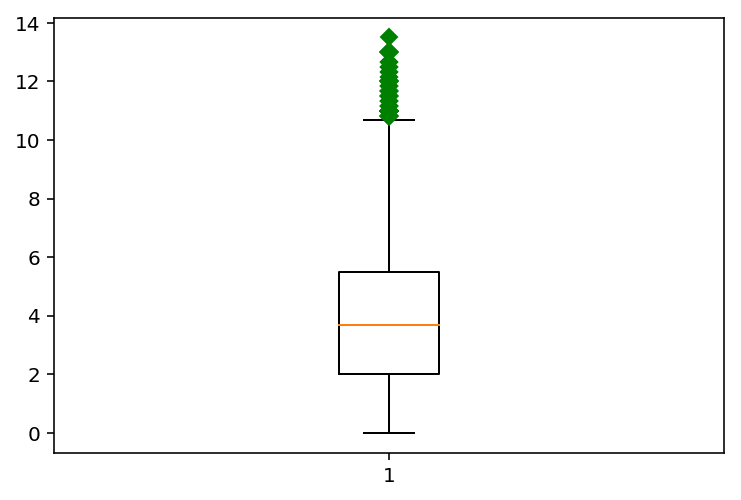

In [71]:
plt.figure()
plt.boxplot(data['Windspeed'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b018a0cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x24b018a7748>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b018b0400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b018a7f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b018a0e48>,
  <matplotlib.lines.Line2D at 0x24b018a7320>]}

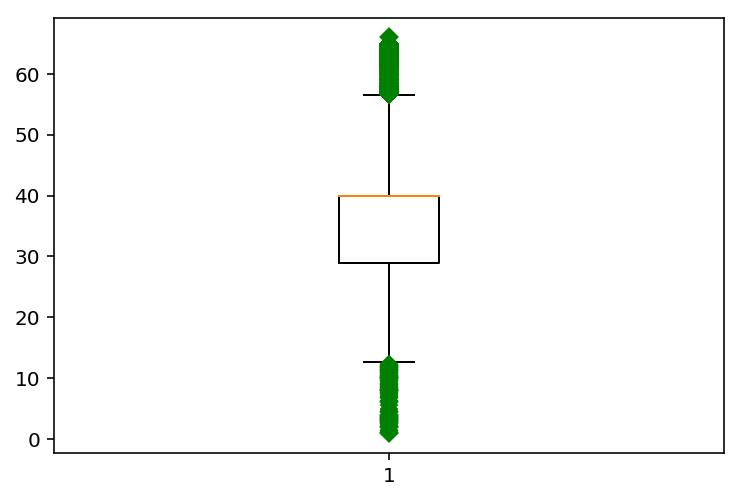

In [72]:
plt.figure()
plt.boxplot(data['Visibility'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b019094a8>],
 'caps': [<matplotlib.lines.Line2D at 0x24b01909eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b01912b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b01912748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b019095f8>,
  <matplotlib.lines.Line2D at 0x24b01909a90>]}

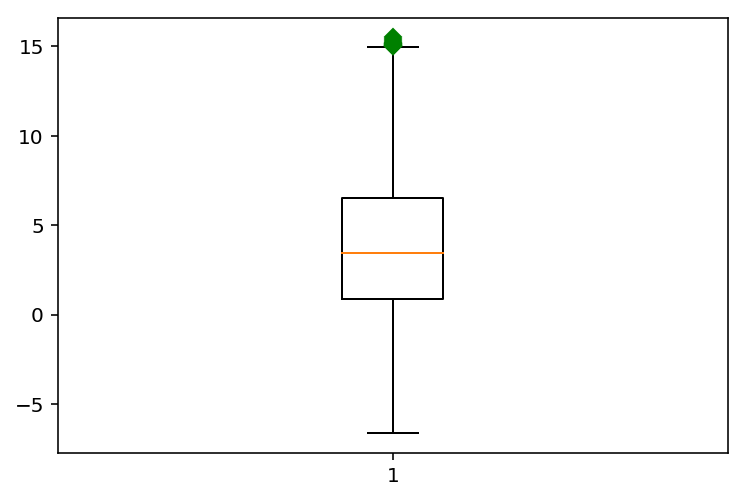

In [73]:
plt.figure()
plt.boxplot(data['Tdewpoint'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b019641d0>],
 'caps': [<matplotlib.lines.Line2D at 0x24b01964be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b0196e898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b0196e470>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b01964320>,
  <matplotlib.lines.Line2D at 0x24b019647b8>]}

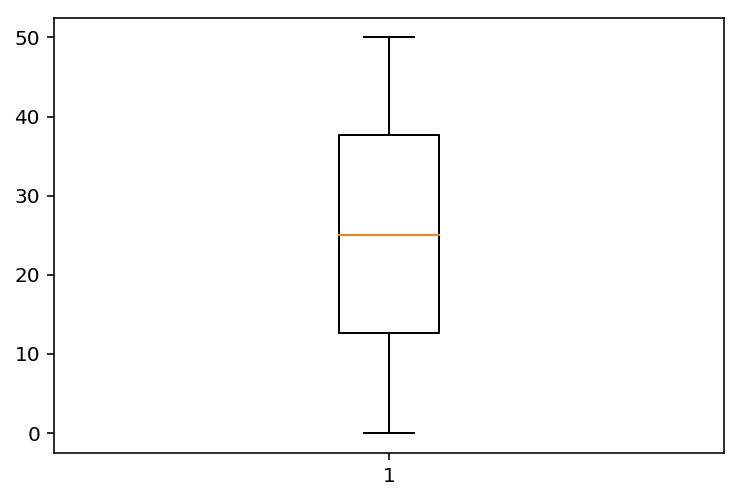

In [74]:
plt.figure()
plt.boxplot(data['rv1'], 0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x24b01ea74a8>],
 'caps': [<matplotlib.lines.Line2D at 0x24b01ea7eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b01eadb70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24b01ead748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24b01ea75f8>,
  <matplotlib.lines.Line2D at 0x24b01ea7a90>]}

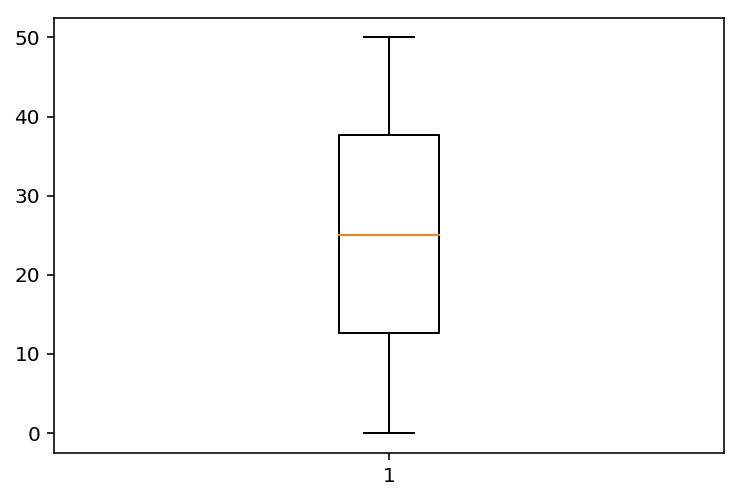

In [75]:
plt.figure()
plt.boxplot(data['rv2'], 0,'gD')

In [ ]:
#seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)¶
# box plot to show distributions with respect to categories.
# A box plot (or box-and-whisker plot) showing the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable

#plt.rcParams['figure.figsize'] = (23,10)
# ax = sns.boxplot(x="make", y='price', data=data_1)

### Calculation of Outliers

<p><img alt="" src="./images/Anomalies_Calculation.PNG" /></p>
